In [2]:
import nibabel as nib
import nilearn.plotting as niplt
%matplotlib inline
import numpy as np
from pylab import *

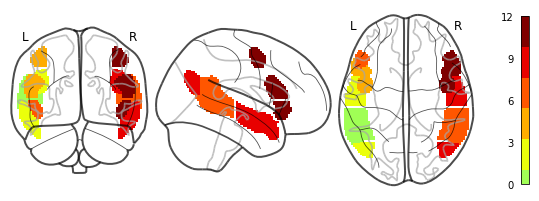

In [27]:
affine=nib.load('/jukebox/griffiths/bert-brains/LangParcels_n220_LH.img').affine
lh=np.round(nib.load('/jukebox/griffiths/bert-brains/LangParcels_n220_LH.img').get_fdata()).astype('int')
rh=np.round(nib.load('/jukebox/griffiths/bert-brains/LangParcels_n220_RH.img').get_fdata()).astype('int')
rh[rh>0]+=6
fed_roi_img=nib.Nifti1Image((lh+rh).astype('float'),affine)

cmap = cm.get_cmap('jet', 12) 

niplt.plot_glass_brain(fed_roi_img,colorbar=True,cmap=cmap)
#nib.save(fed_roi_img,'/jukebox/griffiths/bert-brains/federenko_roi_raw.nii')

In [34]:
for dataset in ['slumlordreach','black']:
    parcel_img=nib.load('/jukebox/griffiths/bert-brains/'+dataset+'_data/Schaefer1000_3mm.nii.gz')
    parcel_volume=parcel_img.get_fdata().astype('int')
    roi_img=nib.load('/jukebox/griffiths/bert-brains/'+dataset+'_data/Federenko_3mm.nii.gz')
    roi_volume=roi_img.get_fdata().astype('int')
    
    parcels_to_roi=np.zeros((1000,))
    for p in range(1000):
        counts=np.zeros((12,))
        roi_parcel=roi_volume[np.where(parcel_volume==p+1)]
        for roi in range(12):
            counts[roi]=np.sum(roi_parcel==roi+1)
        best_roi=np.argmax(counts)
        best_count=counts[best_roi]
        num_parcel_voxels=np.sum(parcel_volume==p+1)
        if best_count>=num_parcel_voxels*0.4:
            parcels_to_roi[p]=best_roi+1 
    np.save('/jukebox/griffiths/bert-brains/'+dataset+'_data/Parcel2ROI.npy',parcels_to_roi) 
    

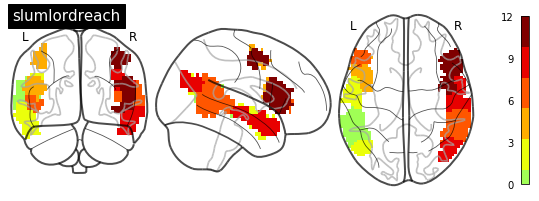

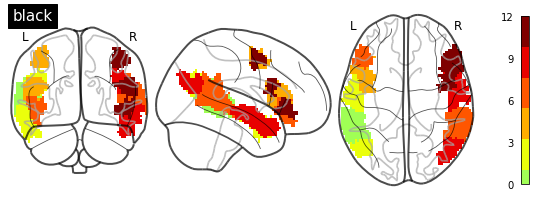

In [35]:
for dataset in ['slumlordreach','black']:
    parcel_img=nib.load('/jukebox/griffiths/bert-brains/'+dataset+'_data/Schaefer1000_3mm.nii.gz')
    parcel_volume=parcel_img.get_fdata().astype('int')
    mapping=np.load('/jukebox/griffiths/bert-brains/'+dataset+'_data/Parcel2ROI.npy')
    roi_volume=np.zeros(parcel_volume.shape)
    for p in range(1000):
        roi_volume[np.where(parcel_volume==p+1)]=mapping[p]
    roi_img=nib.Nifti1Image(roi_volume,parcel_img.affine) 
    niplt.plot_glass_brain(roi_img,colorbar=True,cmap=cmap,title=dataset)